In [1]:
import sys
try:
    import sntd
except:
    try:
        sys.path.append('../')
        import sntd
    except:
        !pip install sntd
        import sntd
import numpy as np
import matplotlib.pyplot as plt

Telescope: HST
Object: My Type Ia SN
Number of bands: 2

------------------
Image: image_1:
Bands: ['F125W', 'F110W']
Date Range: 0.00000->123.52941
Number of points: 50

Metadata:
   z:1.33
   t0:10.0
   x0:1.3402373511523505e-05
   x1:1.162597858751397
   c:-0.20008570386093505
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:7
   td:10.0
------------------
Image: image_2:
Bands: ['F125W', 'F110W']
Date Range: 30.88235->175.00000
Number of points: 58

Metadata:
   z:1.33
   t0:70.0
   x0:6.701186755761753e-06
   x1:1.162597858751397
   c:-0.20008570386093505
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:3.5
   td:70.0
------------------


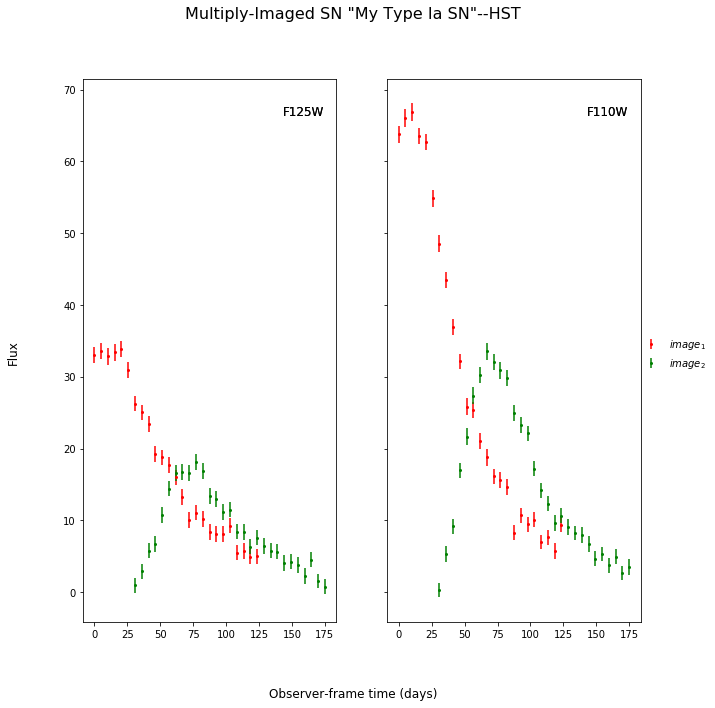

In [2]:
##create a simple MISN and plot
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2], cadence=5., epochs=35.,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST')
print(myMISN)
myMISN.plot_object()
plt.show()

Telescope: HST
Object: My Type Ia SN
Number of bands: 2

------------------
Image: image_1:
Bands: ['F125W', 'F110W']
Date Range: 55000.00000->55123.52941
Number of points: 50

Metadata:
   z:1.33
   t0:55010.0
   x0:7.294336412201392e-06
   x1:-0.8837469335770917
   c:-0.11510027563908654
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:7
   td:10.0
------------------
Image: image_2:
Bands: ['F125W', 'F110W']
Date Range: 55025.73529->55175.00000
Number of points: 59

Metadata:
   z:1.33
   t0:55070.0
   x0:3.647168206100696e-06
   x1:-0.8837469335770917
   c:-0.11510027563908654
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:3.5
   td:70.0
------------------


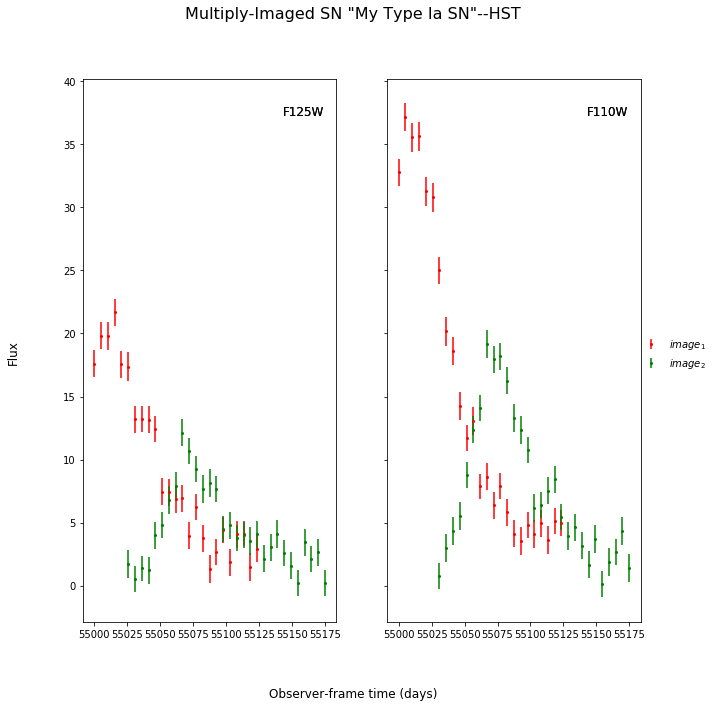

In [3]:
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2],start_time=55000, cadence=5., epochs=35.,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST')
print(myMISN)
myMISN.plot_object()
plt.show()

Telescope: HST
Object: My Type Ia SN
Number of bands: 2

------------------
Image: image_1:
Bands: ['F125W', 'F110W']
Date Range: 55000.00000->55125.00000
Number of points: 52

Metadata:
   z:1.33
   t0:55010.0
   x0:4.874923129996163e-06
   x1:1.670002232612337
   c:-0.030568307019089365
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:7
   td:10.0
------------------
Image: image_2:
Bands: ['F125W', 'F110W']
Date Range: 55025.00000->55185.00000
Number of points: 64

Metadata:
   z:1.33
   t0:55070.0
   x0:2.4374615649980817e-06
   x1:1.670002232612337
   c:-0.030568307019089365
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:3.5
   td:70.0
------------------


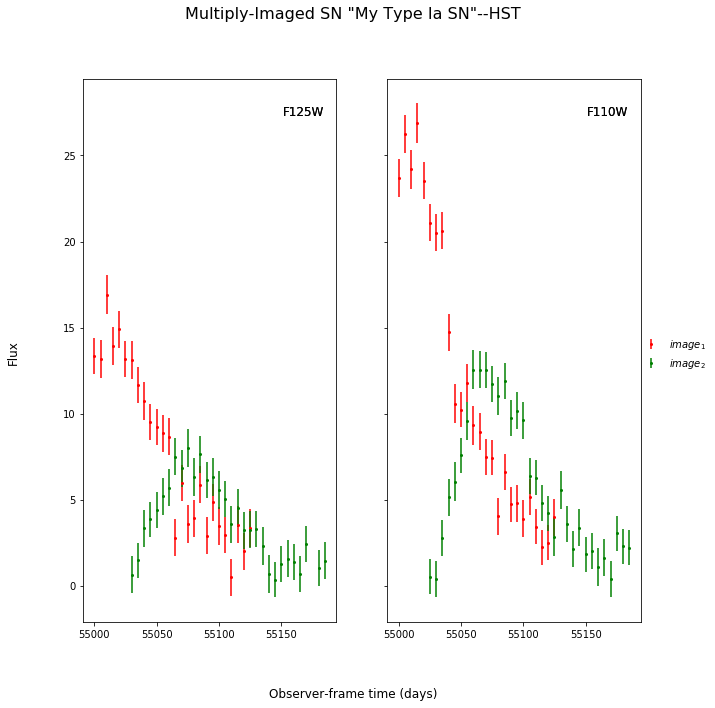

In [4]:
##simulation with specified time array
time_array=np.arange(55000,55300,5)
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2], timeArr=time_array,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST')
print(myMISN)
myMISN.plot_object()
plt.show()

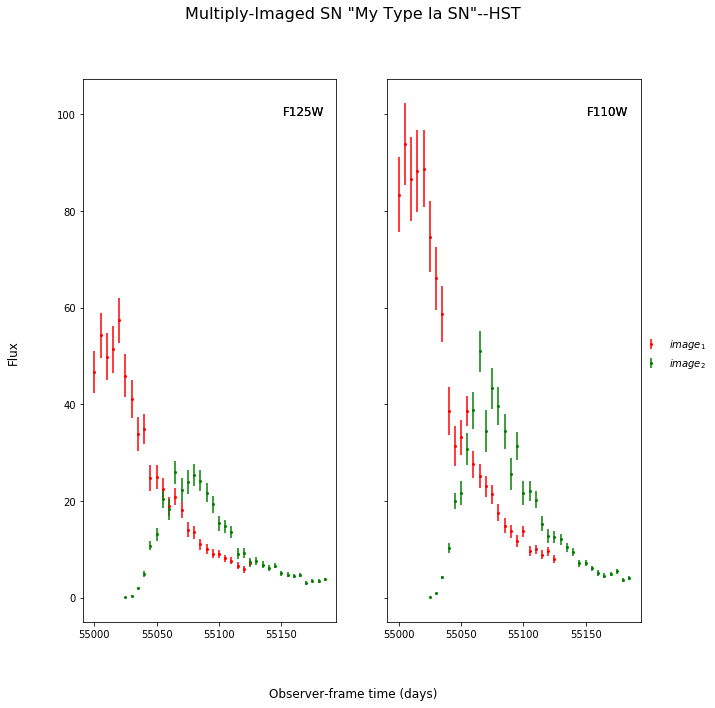

In [5]:
##simulation with specified (constant) SNR
SNR_dict={}
for band in ['F110W','F125W']:
    SNR_dict[band]=lambda mag:10 # this just needs to be a function accepting a magnitude and
                                 # returning a SNR
time_array=np.arange(55000,55300,5)
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2], timeArr=time_array,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST',snrFunc=SNR_dict)
myMISN.plot_object()
plt.show()

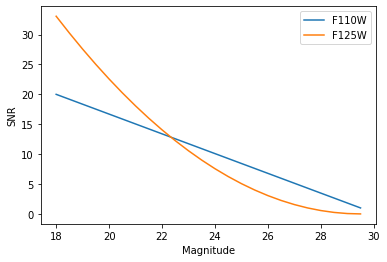

../sntd/simulation.py:466: RuntimeWarning: invalid value encountered in log10
  fluxerr[inds]=np.abs(flux[inds]/snrFunc[b](-2.5*np.log10(flux[inds])+snobs[colname['zp']][inds]))
/Users/jpierel/anaconda3/envs/sntd_test3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/jpierel/anaconda3/envs/sntd_test3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
../sntd/simulation.py:482: RuntimeWarning: invalid value encountered in greater
  if not np.any(flux/fluxerr > thresh):
../sntd/simulation.py:485: RuntimeWarning: invalid value encountered in greater
  inds=np.where(flux/fluxerr>thresh)[0]


Telescope: HST
Object: My Type Ia SN
Number of bands: 2

------------------
Image: image_1:
Bands: ['F125W', 'F110W']
Date Range: 55000.00000->55125.00000
Number of points: 52

Metadata:
   z:1.33
   t0:55010.0
   x0:1.039540731517146e-05
   x1:-0.778192029856702
   c:-0.021630456668395106
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:7
   td:10.0
------------------
Image: image_2:
Bands: ['F125W', 'F110W']
Date Range: 55030.00000->55185.00000
Number of points: 63

Metadata:
   z:1.33
   t0:55070.0
   x0:5.19770365758573e-06
   x1:-0.778192029856702
   c:-0.021630456668395106
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:3.5
   td:70.0
------------------


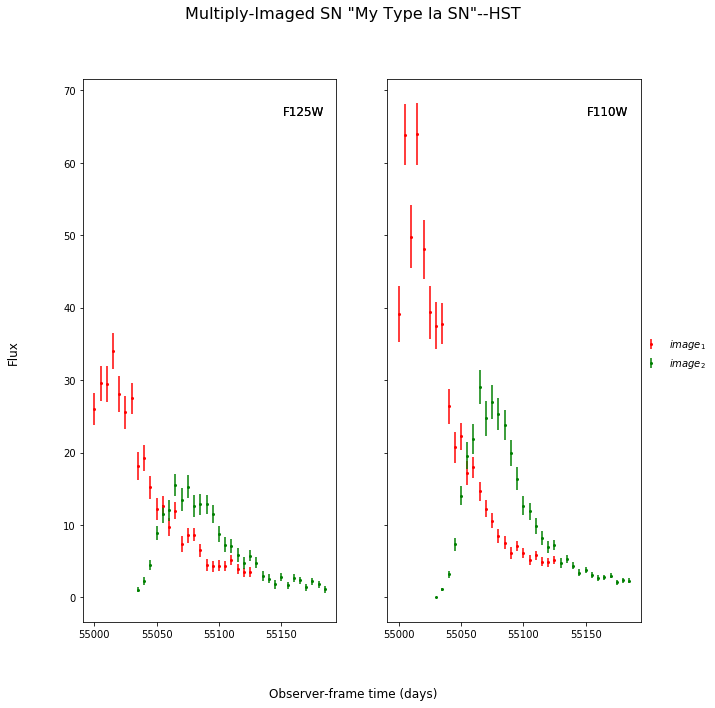

In [6]:
##simulation with specified (non-constant) SNR
from scipy.interpolate import interp1d 
mags=np.arange(18,30,.5) 
SNR_dict={'F110W':np.linspace(20,1,len(mags)), #some random curves for SNR by band (see plot)
          'F125W':np.flip([(x/4)**2 for x in range(len(mags))])}
SNR_funcs={'F110W':interp1d(mags,SNR_dict['F110W'],fill_value=0.5,bounds_error=False),
           'F125W':interp1d(mags,SNR_dict['F125W'],fill_value=0.5,bounds_error=False)}
            #you can leave the bounds error,
            #but this helps with late time light
            #curves
plt.plot(mags,SNR_dict['F110W'],label="F110W")
plt.plot(mags,SNR_dict['F125W'],label="F125W")
plt.xlabel('Magnitude')
plt.ylabel('SNR')
plt.legend()
plt.show()

for band in ['F110W','F125W']:
    SNR_dict[band]=interp1d(mags,SNR_dict[band])
time_array=np.arange(55000,55300,5)
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2], timeArr=time_array,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST',snrFunc=SNR_funcs)
print(myMISN)
myMISN.plot_object()
plt.show()

Telescope: HST
Object: My Type Ia SN
Number of bands: 2

------------------
Image: image_1:
Bands: ['F125W', 'F110W']
Date Range: 0.00000->123.52941
Number of points: 50

Metadata:
   z:1.33
   t0:10.0
   x0:1.6054189786150377e-05
   x1:0.398595712120313
   c:-0.06554824586117075
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:7
   td:10.0
------------------
Image: image_2:
Bands: ['F125W', 'F110W']
Date Range: 30.88235->175.00000
Number of points: 58

Metadata:
   z:1.33
   t0:70.0
   x0:8.027094893075188e-06
   x1:0.398595712120313
   c:-0.06554824586117075
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:3.5
   td:70.0
------------------


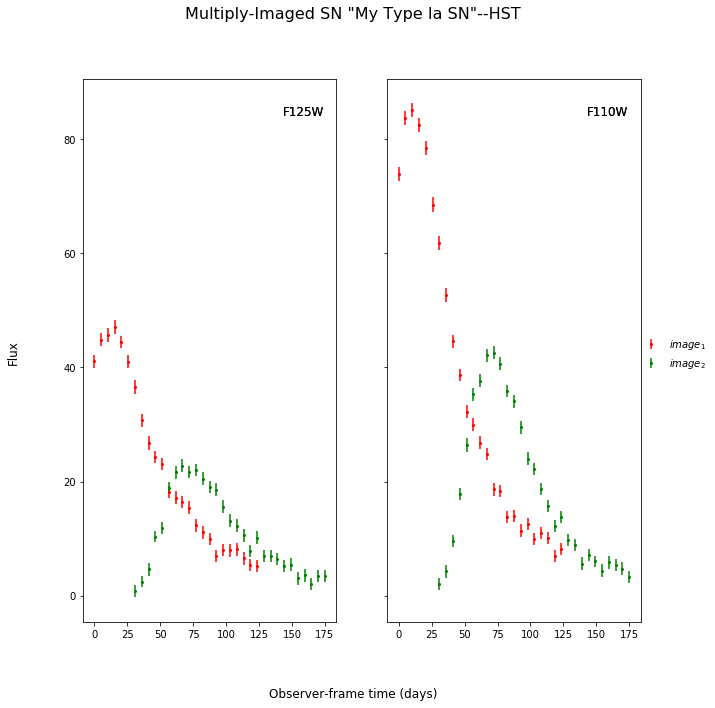

In [7]:
##simulation with set SN parameter distributions
def x1_func():
    return(np.random.normal(1,.5))
def c_func():
    return(np.random.normal(-.05,.02))
param_funcs={'x1':x1_func,'c':c_func}
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2], cadence=5., epochs=35.,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST',sn_params=param_funcs)
print(myMISN)
myMISN.plot_object()
plt.show()

Telescope: HST
Object: My Type Ia SN
Number of bands: 2

------------------
Image: image_1:
Bands: ['F125W', 'F110W']
Date Range: 0.00000->123.52941
Number of points: 49

Metadata:
   z:1.33
   t0:10.0
   x0:1.4283958572513736e-05
   x1:0.2223698678701896
   c:-0.02625911933485857
   sourcez:1.33
   hostebv:0.1505130729585158
   lensebv:0.23242374209009695
   lensz:0.53
   mu:7
   td:10.0
------------------
Image: image_2:
Bands: ['F125W', 'F110W']
Date Range: 30.88235->175.00000
Number of points: 58

Metadata:
   z:1.33
   t0:70.0
   x0:7.141979286256868e-06
   x1:0.2223698678701896
   c:-0.02625911933485857
   sourcez:1.33
   hostebv:0.1505130729585158
   lensebv:0.23242374209009695
   lensz:0.53
   mu:3.5
   td:70.0
------------------


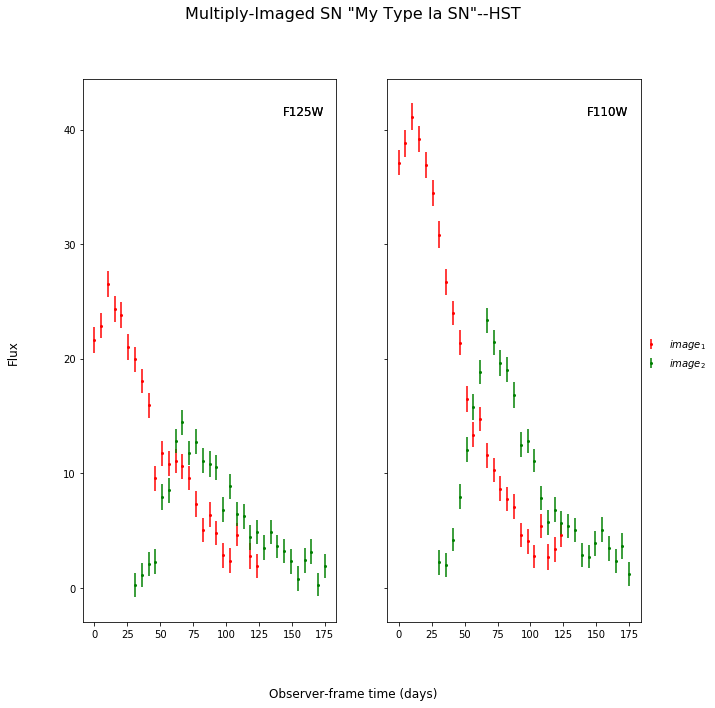

In [8]:
##simulation with set dust parameter distributions
def hostav_func():
    return(np.random.normal(.5,.1))
def lensav_func():
    return(np.random.normal(.7,.2))
param_funcs={'host':hostav_func,'lens':lensav_func}
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2], cadence=5., epochs=35.,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST',av_dists=param_funcs)
print(myMISN)
myMISN.plot_object()
plt.show()